In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


pd.set_option('display.max_columns',200)

In [2]:
data = pd.read_csv('datasets/Diabetes_Data_1.csv')

In [3]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
data.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
data.duplicated().sum()

np.int64(269)

<Axes: xlabel='Gender', ylabel='count'>

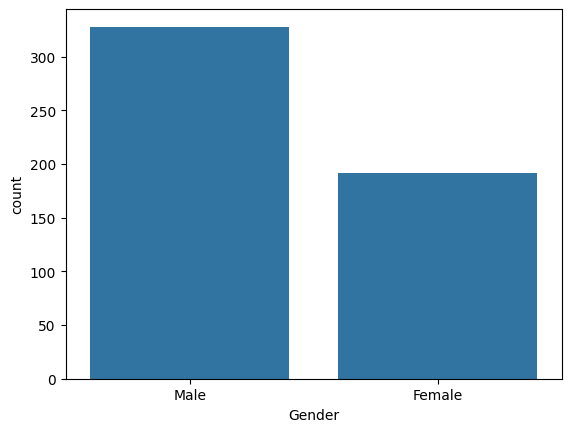

In [8]:
sns.countplot(x='Gender',
              data=data)

<Axes: xlabel='class', ylabel='count'>

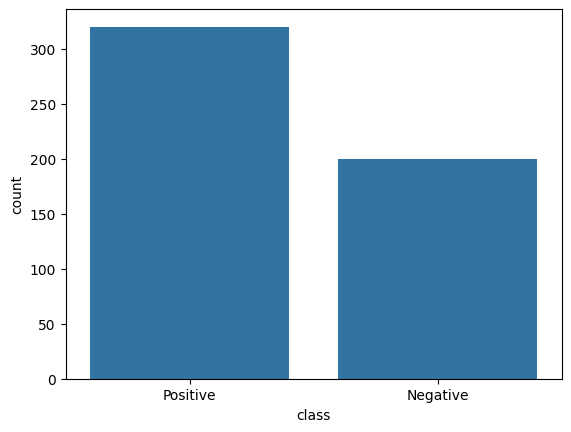

In [9]:
sns.countplot(x='class',
              data=data)

data has more positive diabetes cases compared to Negative cases

<Axes: xlabel='class', ylabel='count'>

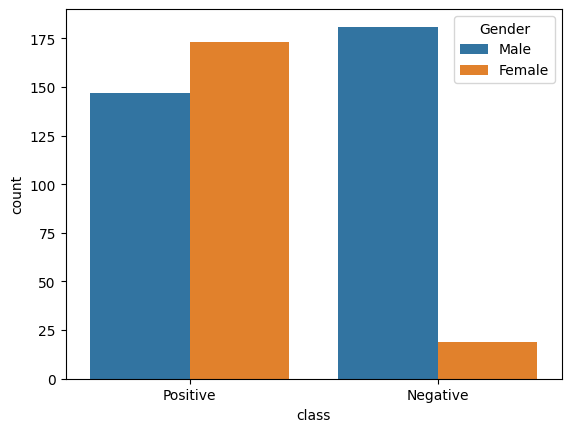

In [10]:
sns.countplot(x='class',
              hue='Gender',
              data=data)

there are more female with diabetes as compared to male, 

and more males not affected by diabetes as compared to female

In [11]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


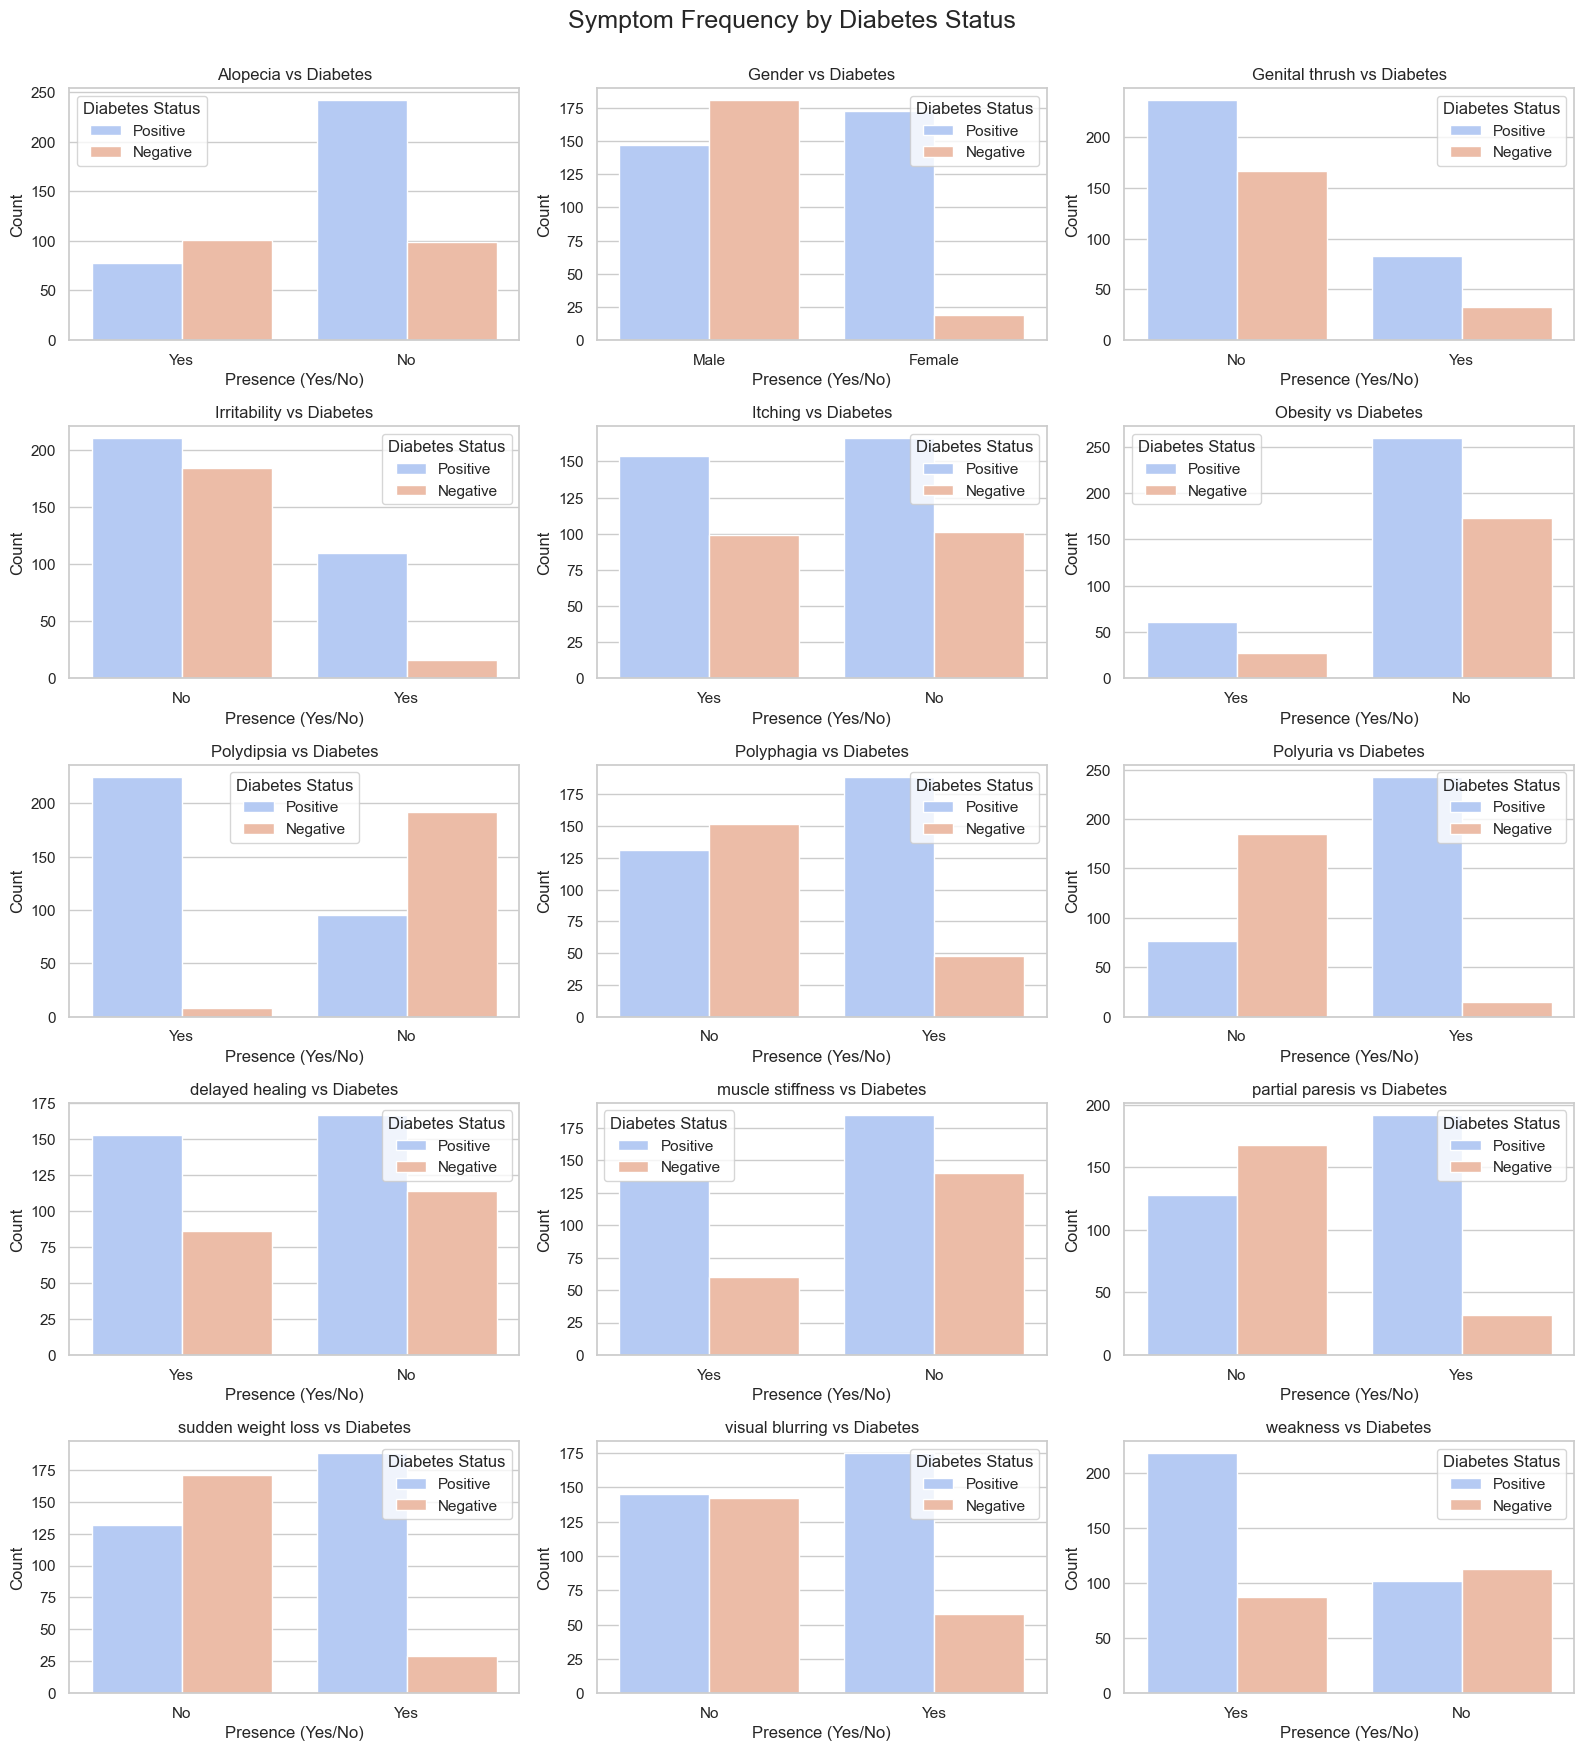

In [30]:
#  Visualize feature impact on diabetes - Symptom frequency comparison

# Set up visualization style
sns.set_theme(style="whitegrid")

# Exclude the 'Age' and 'class' columns for binary comparison
binary_features = data.columns.difference(['Age', 'class'])

# Create subplots to visualize each symptom against diabetes status
plt.figure(figsize=(16, 20))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=feature, hue='class', data=data, palette='coolwarm')
    plt.title(f'{feature} vs Diabetes')
    plt.xlabel('Presence (Yes/No)')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status')

plt.tight_layout()
plt.suptitle('Symptom Frequency by Diabetes Status', fontsize=18, y=1.02)

plt.savefig('visualization.png')
plt.show()


polyuria --a large number of diabetic individuals experience polyuria(passing a large number of urination.

polydipsia - (intense thirst)  --diabetic individuals are more likely to report polydipsia.

sudden weight weakness -- Diabetic individuals tend to experience sudden weight loss.

weakness --Diabetic individuals tend to experience sudden weakness


C:\Users\Alvin\AppData\Local\Temp\ipykernel_2412\2995773597.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diabetes Status')


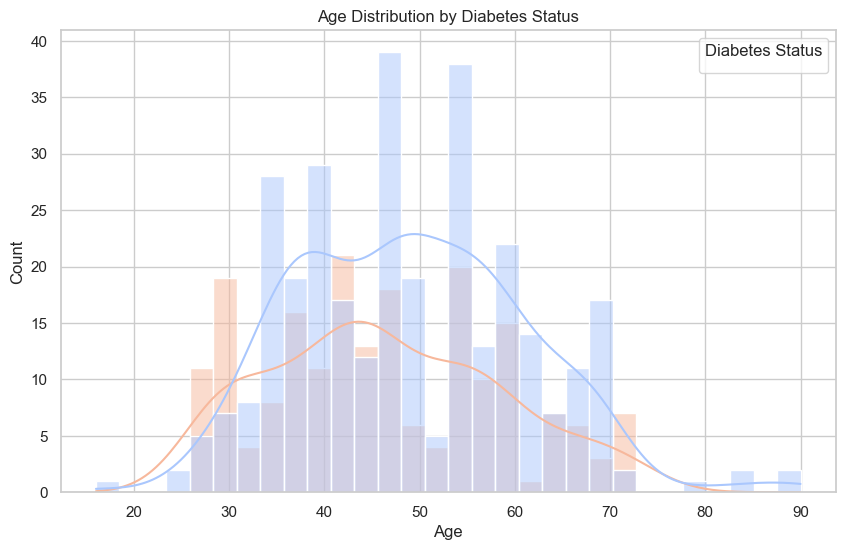

In [37]:
# Step 5: Visualize Age Distribution by Diabetes Status

plt.figure(figsize=(10, 6))
sns.histplot(data, x='Age', 
             hue='class', 
             kde=True, 
             palette='coolwarm', 
             bins=30)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')

plt.savefig('age_distribution.png')
plt.show()


Higher Risk Age Group: Diabetes cases are more frequent between ages 40-60, showing a higher risk for middle-aged individuals.

Lower Risk Age Group: Individuals under 30 have a lower likelihood of diabetes.

Overlap: While diabetes is more common in older groups, some younger individuals are still affected.

In [14]:
data1= data.copy()

In [20]:
data1 = data.replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0 })

C:\Users\Alvin\AppData\Local\Temp\ipykernel_2412\1195043719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1 = data.replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0 })


In [21]:
data1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [22]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
data.columns

<Axes: >

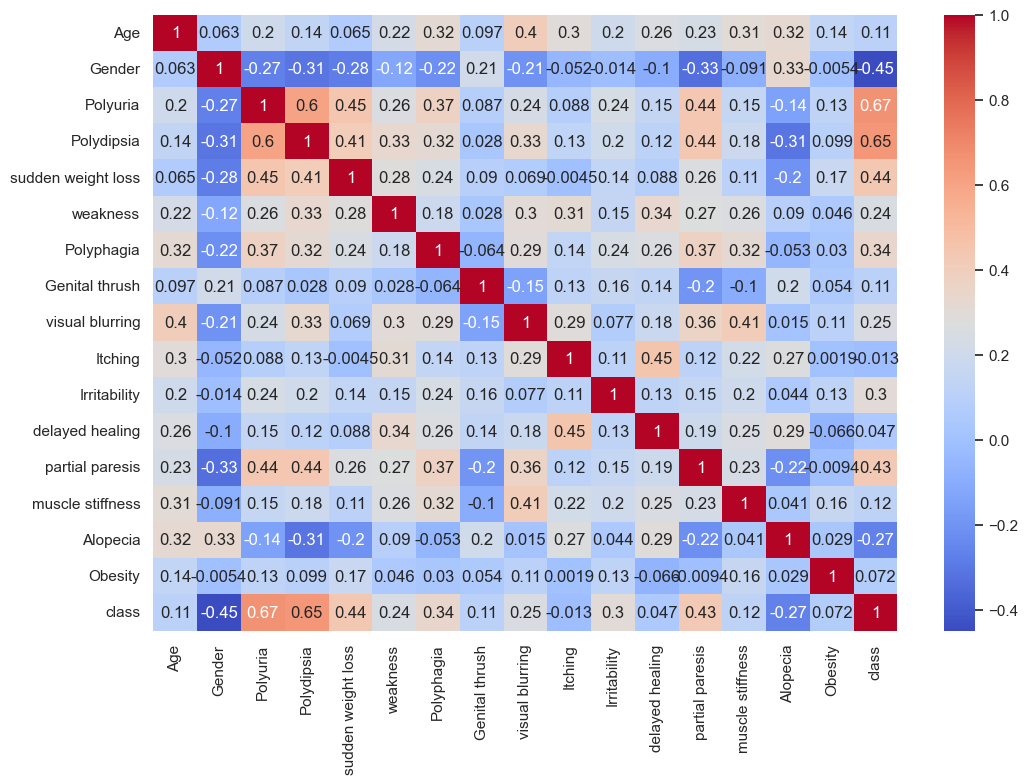

In [46]:
data_corr = data1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr, annot= True, cmap='coolwarm')